In [1]:
from sympy import *
x = symbols('x')
roots=solve(Eq(x**2-0.3*x+0.5, 0), x)

In [2]:
if ((abs(roots[1])<1)&(abs(roots[1])<1)):
    print("Ряд стационарный")
else:
    print("Ряд нестационарный")

Ряд стационарный


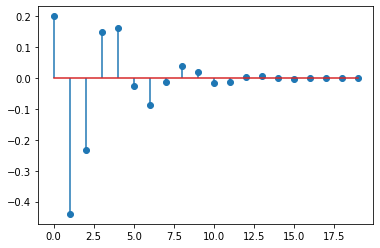

In [24]:
import matplotlib.pyplot as plt
acorr=[]
a1=0.3
a2=-0.5
acorr.append(a1/(1-a2))
acorr.append(a1*acorr[0]+a2)
for i in range(2,20):
    acorr.append(a1*acorr[i-1]+a2*acorr[i-2])
fig, ax = plt.subplots()
ax.stem(acorr)
plt.show()

In [4]:
import pandas as pd
pressure = pd.read_excel('pressure.xlsx')
list_pres1=list(pressure['pressuare'])
pressure['delta']=pressure['pressuare']-pressure['pressuare'].shift(1)
pressure=pressure.drop(['pressuare'],axis=1)
pressure=pressure.iloc[1:,:]
pr_index=list(pressure.index)

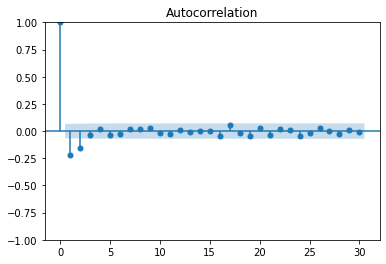

In [5]:
from statsmodels.graphics import tsaplots
fig = tsaplots.plot_acf(pressure['delta'])

C:\Users\Ekaterina\AppData\Roaming\Python\Python38\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


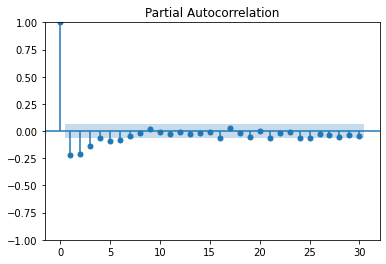

In [6]:
fig = tsaplots.plot_pacf(pressure['delta'])

In [7]:
pressure

,delta
1,-0.001766
2,0.001883
3,0.000086
4,0.000486
5,-0.000689
...,...
895,0.000137
896,-0.003273
897,0.000341
898,0.003214


In [8]:
pressure['lag1']=pressure['delta'].shift(1)
pressure['lag2']=pressure['delta'].shift(2)
pressure['lag3']=pressure['delta'].shift(3)
pressure['lag4']=pressure['delta'].shift(4)

In [9]:
pressure

,delta,lag1,lag2,lag3,lag4
1,-0.001766,NaN,NaN,NaN,NaN
2,0.001883,-0.001766,NaN,NaN,NaN
3,0.000086,0.001883,-0.001766,NaN,NaN
4,0.000486,0.000086,0.001883,-0.001766,NaN
5,-0.000689,0.000486,0.000086,0.001883,-0.001766
...,...,...,...,...,...
895,0.000137,0.001877,-0.001625,0.001194,-0.001259
896,-0.003273,0.000137,0.001877,-0.001625,0.001194
897,0.000341,-0.003273,0.000137,0.001877,-0.001625
898,0.003214,0.000341,-0.003273,0.000137,0.001877


In [10]:
import numpy as np
pressure_np=np.array(pressure)
pressure_np=pressure_np[4:,:]

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False).fit(pressure_np[:,1:],pressure_np[:,0])
coef4=model.coef_
model = LinearRegression(fit_intercept=False).fit(pressure_np[:,1:4],pressure_np[:,0])
coef3=model.coef_
model = LinearRegression(fit_intercept=False).fit(pressure_np[:,1:3],pressure_np[:,0])
coef2=model.coef_

In [12]:
er4=pressure_np[:,0]-np.matmul(pressure_np[:,1:],coef4)
er3=pressure_np[:,0]-np.matmul(pressure_np[:,1:4],coef3)
er2=pressure_np[:,0]-np.matmul(pressure_np[:,1:3],coef2)

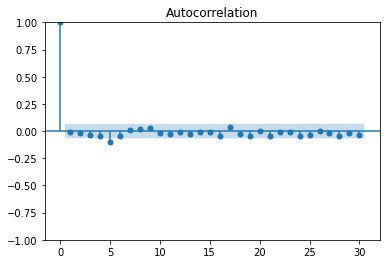

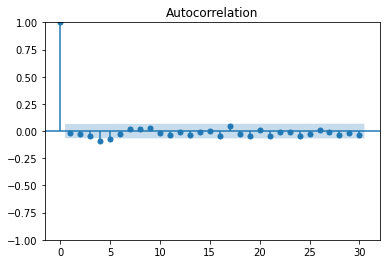

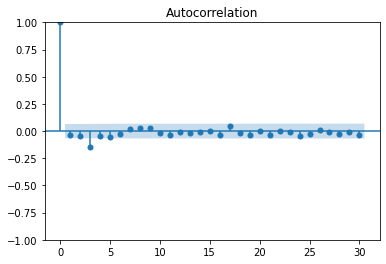

In [13]:
fig = tsaplots.plot_acf(er4, lags= 30)
fig = tsaplots.plot_acf(er3, lags= 30)
fig = tsaplots.plot_acf(er2, lags= 30)

In [14]:
print(np.var(er4))
print(np.var(er3))
print(np.var(er2))

2.0006716086177412e-06
2.009446334833933e-06
2.0478838297100826e-06


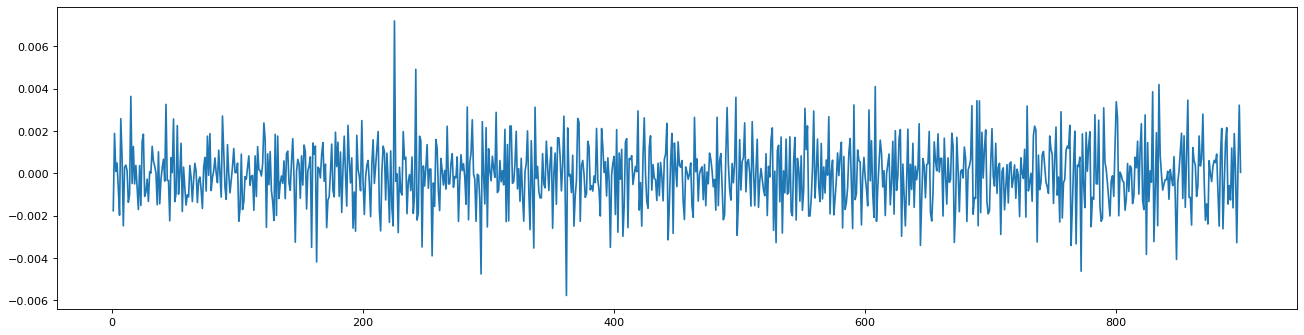

In [15]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(20, 5), dpi=80)
plt.plot(pressure['delta'])

In [16]:
coef3=list(coef3)
coef3.reverse()

In [17]:
list_pres=list(pressure['delta'])
for i in range(150):
    list_pres.append(np.dot(list_pres[-4:-1],coef3))
    list_pres1.append(list_pres1[-1]+np.dot(list_pres[-4:-1],coef3))

In [18]:
a=range(len(list_pres))
a=list(a)

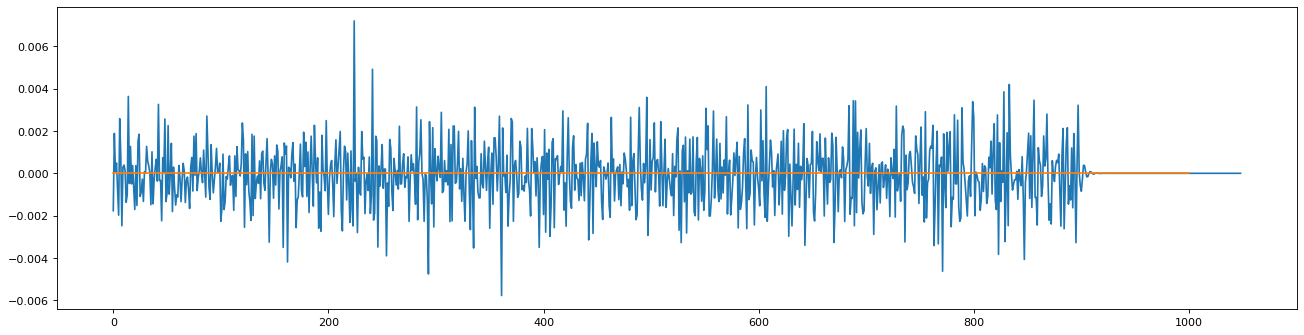

In [19]:
figure(figsize=(20, 5), dpi=80)
plt.plot(a, list_pres)
plt.plot([0,1000],[0,0])

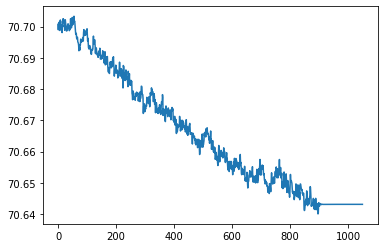

In [20]:
a=range(len(list_pres1))
a=list(a)
plt.plot(a, list_pres1)